<a href="https://colab.research.google.com/github/KhannaShivang/BrainTumorDetection/blob/main/BrainTumorDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#get the data from
!wget https://www.dropbox.com/scl/fi/oe65yn618esndeot7wnm0/Brain-Tumor-Data-Set.zip?rlkey=wut9eean2i8acwknkszoh8k71&st=1stt90vo&dl=0

--2024-07-09 07:42:01--  https://www.dropbox.com/scl/fi/oe65yn618esndeot7wnm0/Brain-Tumor-Data-Set.zip?rlkey=wut9eean2i8acwknkszoh8k71
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucecba7ff5aff5113ce8596cbf9f.dl.dropboxusercontent.com/cd/0/inline/CWXP_knyA-uVsfoalJrRAgCf2_ZYc9wp30VEAc_hCMMX-EUgFHgDvZMuqnDD6YuI1mTNnMud-FNyxN8wb71FcLG1lySUEpMgAl2z9wGSyNZIgpqZcHX0nxIEEK5VvndDWInwD2Po_IlO0DXkMWWD-Ncv/file# [following]
--2024-07-09 07:42:02--  https://ucecba7ff5aff5113ce8596cbf9f.dl.dropboxusercontent.com/cd/0/inline/CWXP_knyA-uVsfoalJrRAgCf2_ZYc9wp30VEAc_hCMMX-EUgFHgDvZMuqnDD6YuI1mTNnMud-FNyxN8wb71FcLG1lySUEpMgAl2z9wGSyNZIgpqZcHX0nxIEEK5VvndDWInwD2Po_IlO0DXkMWWD-Ncv/file
Resolving ucecba7ff5aff5113ce8596cbf9f.dl.dropboxusercontent.com (ucecba7ff5aff5113ce8596cbf9f.dl.dropboxusercontent.com)... 162.1

In [3]:
!unzip /content/Brain-Tumor-Data-Set.zip?rlkey=wut9eean2i8acwknkszoh8k71&st=1stt90vo&dl=0

Archive:  /content/Brain-Tumor-Data-Set.zip?rlkey=wut9eean2i8acwknkszoh8k71
replace Brain Tumor Data Set/Brain Tumor/Cancer (1).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename:  NULL
(EOF or read error, treating as "[N]one" ...)

1 archive had warnings but no fatal errors.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob


In [5]:
#count the numer of images in respective classes BrainTumor-0 healthy-1
ROOT_DIR="/content/Brain Tumor Data Set"
number_of_images={}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir]=len(os.listdir(os.path.join(ROOT_DIR,dir)))

number_of_images.items()


dict_items([('Healthy', 2087), ('Brain Tumor', 2513)])

# WE WILL SPLIT THE DATA SUCH THAT
  *70% FOR TRAIN DATA

  *15% FOR VALIDATION


  *15% FOR TESTING

In [6]:
def dataFolder(path,split):
  # WE WILL CREATE A TRAINGIN FOLDER
  if not os.path.exists("./"+path):
    os.mkdir("./"+path)

    for dir in os.listdir(ROOT_DIR):
      os.makedirs("./"+path+"/"+dir)
      for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR,dir)),
                                  size =(math.floor(split*number_of_images[dir])-5),replace=False):
        O=os.path.join(ROOT_DIR,dir,img)
        D=os.path.join("./"+path,dir)
        shutil.copy(O,D)
        os.remove(O)
  else:
    print(f"{path}Folder exists")

In [7]:
dataFolder("train",0.7)

trainFolder exists


In [8]:
dataFolder("val",0.15)

valFolder exists


In [9]:
dataFolder("test",0.15)

testFolder exists


#Model Build

In [10]:

from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

import keras

In [11]:
#CNN model
model = Sequential()
model.add(Conv2D(filters=16 , kernel_size=(3,3),activation='relu' , input_shape = (224,224,3)))

model.add(Conv2D(filters=36 , kernel_size=(3,3),activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64 , kernel_size=(3,3),activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128 , kernel_size=(3,3),activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64, activation= 'relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units= 1,activation= 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 36)      5220      
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 36)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      20800     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)       7

In [12]:
model.compile(optimizer='adam', loss=keras.losses.binary_crossentropy,metrics=['accuracy'])

Preparing our data using Data Generator

In [13]:
def preprocessingImages1(path):
  #input: Path
  #output: Pre processed images
  image_data=ImageDataGenerator(zoom_range= 0.2, shear_range= 0.2, rescale=1/255, horizontal_flip= True)
  image=image_data.flow_from_directory(directory= path, target_size=(224,224), batch_size = 32,class_mode = 'binary')

  return image

In [14]:
path ="/content/train"
train_data = preprocessingImages1(path)

Found 3209 images belonging to 2 classes.


In [15]:
def preprocessingImages2(path):
  #input: Path
  #output: Pre processed images
  image_data=ImageDataGenerator(rescale=1/255)
  image=image_data.flow_from_directory(directory= path, target_size=(224,224), batch_size = 32,class_mode = 'binary')

  return image

In [16]:
path="/content/test"
test_data=preprocessingImages2(path)

Found 679 images belonging to 2 classes.


In [17]:
path="/content/val"
val_data=preprocessingImages2(path)

Found 679 images belonging to 2 classes.


In [18]:
# Early stopping and model check point

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping

es = EarlyStopping(monitor="val_accuracy", min_delta= 0.01, patience= 5, verbose=1, mode = 'auto')

# Model Check Point
mc = ModelCheckpoint(monitor="val_accuracy", filepath="./bestmodel.h5", verbos= 1, save_best_only=True , mode = 'auto')

cb = [es,mc]

#Model Training

In [19]:
hs = model.fit_generator(generator=train_data,
                         steps_per_epoch= 8,
                         epochs= 30,
                         verbose= 1,
                         validation_data= val_data,
                         validation_steps= 16,
                         callbacks=cb)

Epoch 1/30
8/8 [==============================] - 16s 1s/step - loss: 0.8262 - accuracy: 0.5117 - val_loss: 0.6867 - val_accuracy: 0.5586
Epoch 2/30
8/8 [==============================] - 5s 624ms/step - loss: 0.6753 - accuracy: 0.5898 - val_loss: 0.6781 - val_accuracy: 0.5586
Epoch 3/30
8/8 [==============================] - 9s 1s/step - loss: 0.6982 - accuracy: 0.5078 - val_loss: 0.6720 - val_accuracy: 0.5898
Epoch 4/30
8/8 [==============================] - 6s 784ms/step - loss: 0.6740 - accuracy: 0.5977 - val_loss: 0.6574 - val_accuracy: 0.6426
Epoch 5/30
8/8 [==============================] - 6s 761ms/step - loss: 0.6727 - accuracy: 0.5820 - val_loss: 0.6330 - val_accuracy: 0.6426
Epoch 6/30
8/8 [==============================] - 6s 802ms/step - loss: 0.6634 - accuracy: 0.6523 - val_loss: 0.6123 - val_accuracy: 0.6602
Epoch 7/30
8/8 [==============================] - 5s 607ms/step - loss: 0.6742 - accuracy: 0.5898 - val_loss: 0.6587 - val_accuracy: 0.6094
Epoch 8/30
8/8 [=========

In [20]:
# Model Graphical Interpretation

h = hs.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

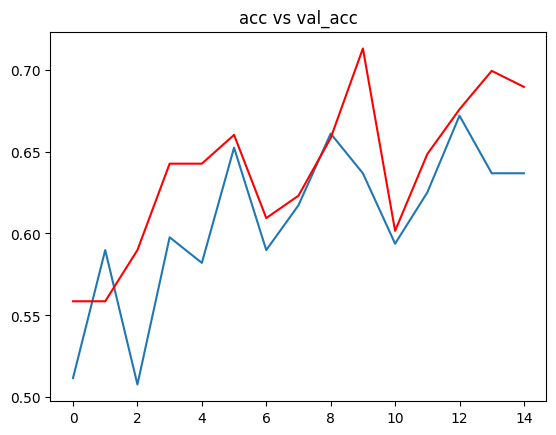

In [21]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] ,c='red')

plt.title("acc vs val_acc")
plt.show()

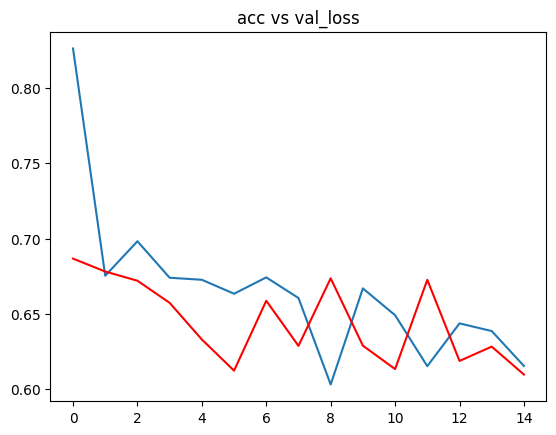

In [22]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] ,c='red')

plt.title("acc vs val_loss")
plt.show()

In [23]:
# Model Accuracy

from keras.models import load_model

model = load_model("/content/bestmodel.h5")

#Model Accuracy

In [24]:
acc = model.evaluate_generator(test_data)[1]

print(f"the accuracy of out model is {acc*100}%")

the accuracy of out model is 71.72312140464783%


In [25]:
from keras.preprocessing.image import load_img,img_to_array

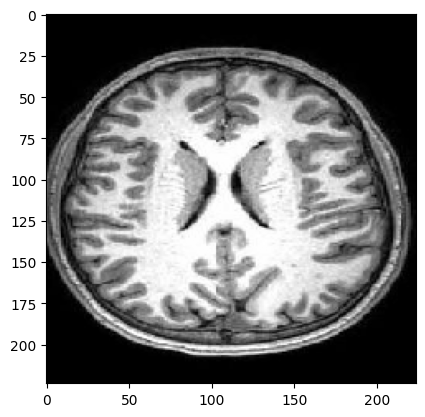

1/1 [==============================] - 0s 342ms/step
The MRI is having a Tumor


In [26]:
path="/content/Brain Tumor Data Set/Healthy/Not Cancer  (362).jpg"

img = load_img(path, target_size= (224,224))
input_arr = img_to_array(img)/255

plt.imshow(input_arr)
plt.show()

input_arr.shape

input_arr = np.expand_dims(input_arr, axis = 0)

pred_probs = model.predict(input_arr)
pred = np.argmax(pred_probs, axis=1)[0]

if(pred==0):
  print("The MRI is having a Tumor")
else:
  print("The MRI is of a Healthy Brain")